<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/modeloSVM_y_SGDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vamos a utilizar maquinas de vectores de soporte para el conunto de datos iris.

In [30]:
#Vamos a cargar el dataset flor iris para comprobar nuestro clasificador SVM.
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [32]:
#normalizamos los datos
from sklearn.preprocessing import StandardScaler
estandar_escaler = StandardScaler()
estandar_escaler.fit(X_train)
X_train_std = estandar_escaler.transform(X_train)
X_test_std = estandar_escaler.transform(X_test)

In [33]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## Ahora que ya preprocesamos los datos importamos el modelo SVM.

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [35]:
from graficar import plot_decision_regionsNew
import matplotlib.pyplot as plt
import numpy as np

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


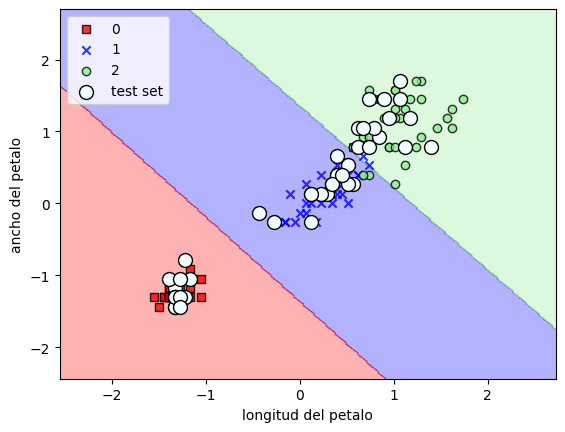

In [36]:
plot_decision_regionsNew(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('longitud del petalo')
plt.ylabel('ancho del petalo')
plt.legend(loc='upper left')
plt.show()

#Ahora utlizaremos una alternativa que ofrece scikit-learn, el SGDClassifier que que soporta aprendizage online a traves del método partial_fit.

In [37]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
regresionLogistica = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')
clasificadores= [svm,regresionLogistica,ppn]
title = ['SVM','regresión logística', 'Perceptrón']

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


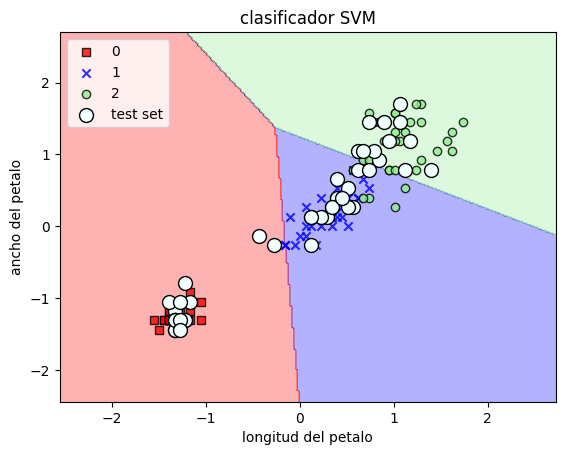

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


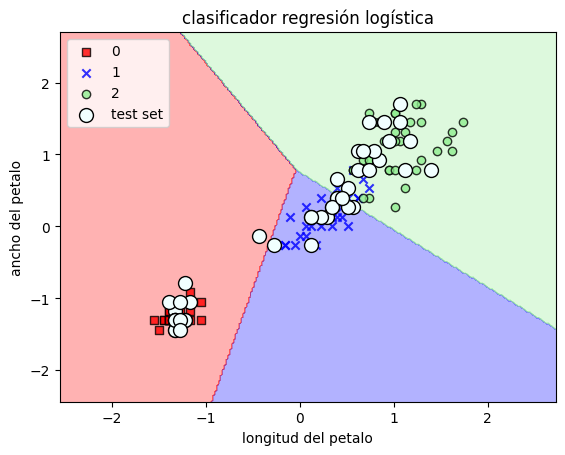

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


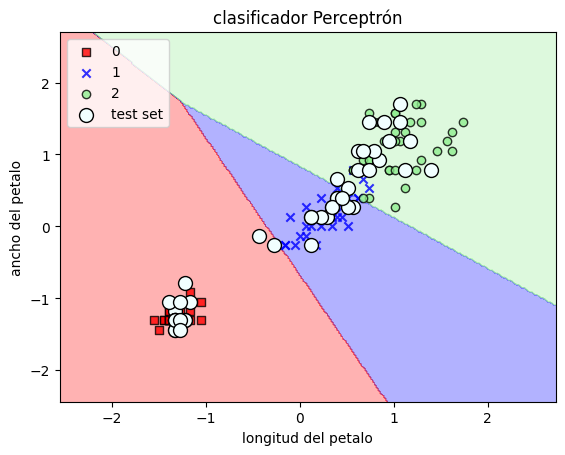

In [38]:
ind = 0
for clasificador in clasificadores :
  clasificador.fit(X_train_std, y_train)
  plot_decision_regionsNew(X_combined_std, y_combined, classifier=clasificador, test_idx=range(105,150))
  plt.title(f'clasificador {title[ind]}')
  plt.xlabel('longitud del petalo')
  plt.ylabel('ancho del petalo')
  plt.legend(loc='upper left')
  plt.show()
  ind+=1

## resolver probemas no lineales con una SVM kernelizada

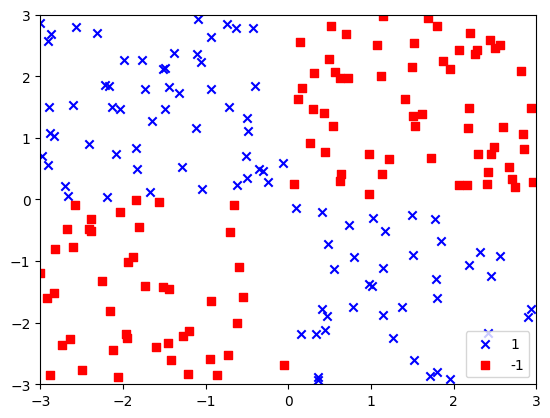

In [39]:
#creando un conjunto de datos XOR con ruido
import matplotlib.pyplot as plt
np.random.seed(1)
X_xor = np.random.rand(200, 2) * 6 - 3  # Generar valores entre -3 y 3
y_xor = np.logical_xor(X_xor[: , 0]> 0, X_xor[: , 1]>0)
y_xor = np.where(y_xor, 1, -1)
# Visualización del conjunto de datos XOR
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

## La idea fundamental que hay detras de los métodos kernel para tratar los datos no separables linealmente es crear combinaciones no lineales de las caracteristicas originales para proyectarlas hacia un espacio de dimensiones mayores mediante una funcion de mapeo ${\phi}$, donde pasan a ser separables lineales.   

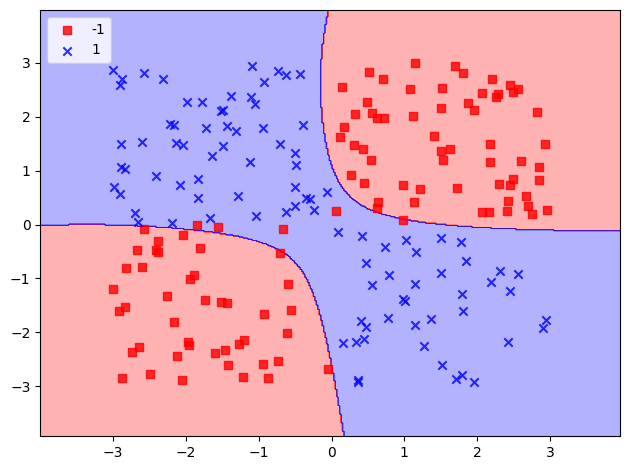

In [47]:
#para entrenar una SVM kernelizada sustituimos el parámetro
#kernel='linear' por kernel='rbf
from graficar import plot_decision_regions
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## el parámetro gamma se puede entender como un parámetro de corte para la esfera Gaussiana. Si aumentamos el valor, aumentamos la influencia o el alcance de las muestras de entrenamiento, lo cual nos lleva a un límite de desición más ajustado pero lleno de baches.

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


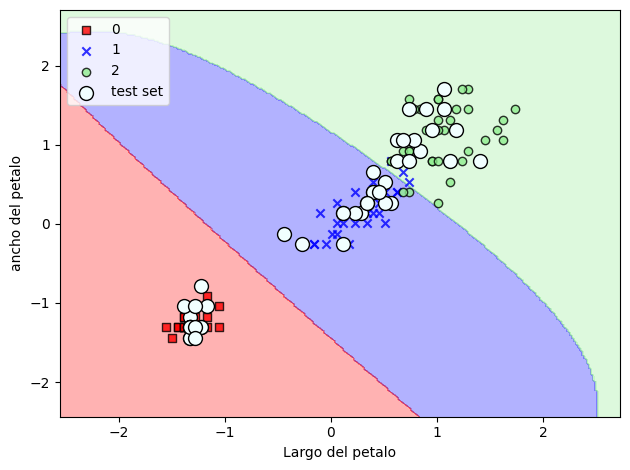

In [46]:
# aplicando un SVM a el conjunto de datos iris.
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regionsNew(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Largo del petalo')
plt.ylabel('ancho del petalo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Como hemos elegido un valor pequeño para gamma el resultado es relativamente suave. Ahora aumentemos el valor para observar el efecto en los límites de desición.  

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


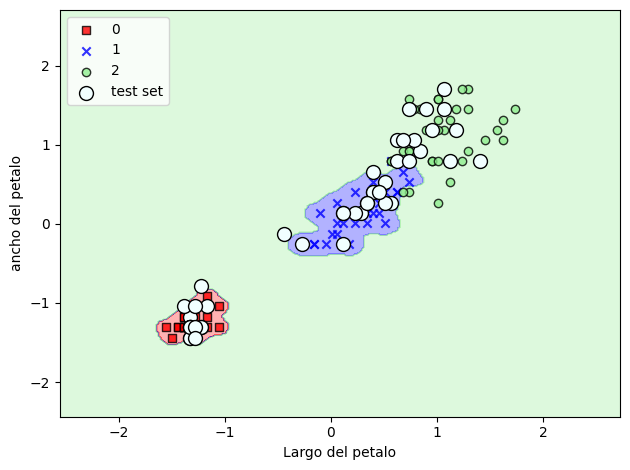

In [48]:
# aumentando el valor de gamma
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regionsNew(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Largo del petalo')
plt.ylabel('ancho del petalo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

##  Aunque el modelo se ajusta muy bien el el conjunto de datos, dicho modelo tendra problemas de generalización con datos no vistos.